In [1]:
import dataUtils as du


In [2]:
imgs = du.load_images_from_gcs(bucket_name="med-img-net",num_images=10)

/Users/wanglan/Documents/MedImgNet/med/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
Loading images: 9image [00:01,  5.83image/s]

Total images loaded: 10


In [3]:
img = imgs[0]

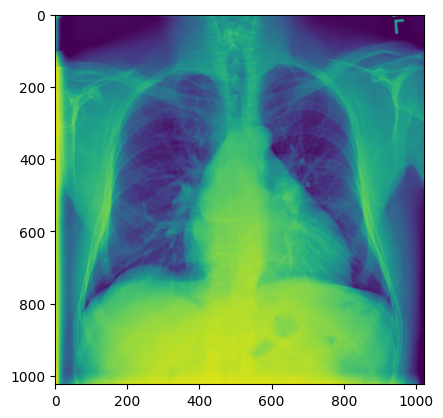

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
from dataUtils import ImageLabelDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [6]:
directories = [
    'datasets/nih-chest-xrays/images_001/images/',
    'datasets/nih-chest-xrays/images_002/images/',
    'datasets/nih-chest-xrays/images_003/images/',
    'datasets/nih-chest-xrays/images_004/images/',
    'datasets/nih-chest-xrays/images_005/images/',
    'datasets/nih-chest-xrays/images_006/images/',
    'datasets/nih-chest-xrays/images_007/images/',
    'datasets/nih-chest-xrays/images_008/images/',
    'datasets/nih-chest-xrays/images_009/images/',
    'datasets/nih-chest-xrays/images_010/images/',
    'datasets/nih-chest-xrays/images_011/images/',
    'datasets/nih-chest-xrays/images_012/images/'
]
normalization = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
dataset = ImageLabelDataset(
    bucket_name='med-img-net',
    csv_file='datasets/nih-chest-xrays/Data_Entry_2017.csv',
    directories=directories, 
    transform=normalization
)



/Users/wanglan/Documents/MedImgNet/med/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
len(dataset)

112120

In [36]:
for i in range(1000):
    img, label = dataset[i]
    if img.shape[0]!=1:

        print(img.shape, label)
        print(i)
        

torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
12
torch.Size([4, 256, 256]) tensor([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
260
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
262
torch.Size([4, 256, 256]) tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
324
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
338
torch.Size([4, 256, 256]) tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
339
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
343
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
379
torch.Size([4, 256, 256]) tensor([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
405
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
430
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
449
torch.Size([4, 256, 256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
524
torch.Size([4, 256, 256]) ten

torch.Size([4, 256, 256])


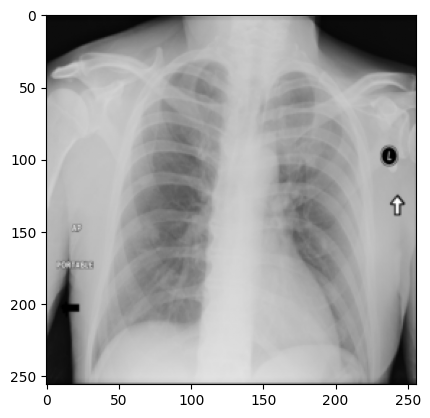

In [19]:
img,_ =dataset[12]
plt.imshow(img[0],cmap='gray')
print(img.shape)

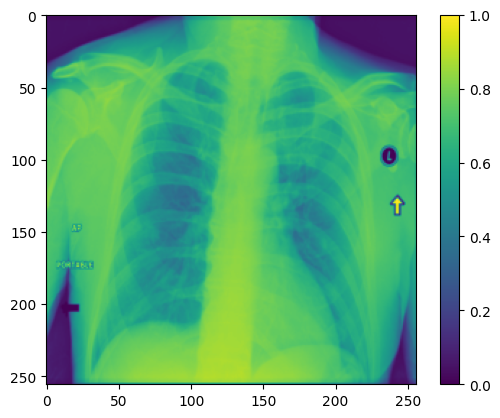

In [29]:
# Extract the first channel (index 0)
first_channel = img[0, :, :]
scond_channel = img[1, :, :]
third_channel = img[2, :, :]
fouth_channel = img[3, :, :]
# Display the first channel

plt.imshow(third_channel)  # Grayscale image
plt.colorbar()  # Show the color scale
plt.show()

tensor(0.)

In [8]:
dataset[112119][0].shape

torch.Size([4, 256, 256])

In [9]:
dataset[7][1]

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

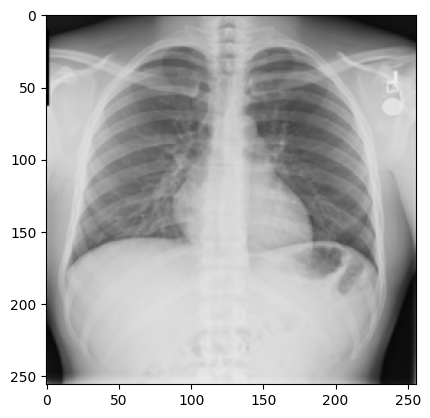

In [10]:
plt.imshow(dataset[112119][0].permute(1, 2, 0))

In [11]:
dataloader = DataLoader(dataset[4], batch_size=2, shuffle=True)